In [ ]:
   pip install pydlm

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for pydlm: filename=pydlm-0.1.1.11-py2.py3-none-any.whl size=58996 sha256=88e701a00aa9bec1bf589660aec569f483e2812667ecfda5d3cc2369f45ef41c
  Stored in directory: /root/.cache/pip/wheels/69/d3/ca/f5a7bc0976a2779bf87c20f82a9adece40616ee3b9d39bf410
Successfully built pydlm


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Agra.csv")

In [ ]:
df.head()

,STATE,DISTRICT,QTR,YR,NSP Male/ NewMicConfMale,NSP Female/ NewMicConf Female,NSP Total/ NewMicConf Total,NEP Male,NEP Female,0-14 yrs NSP(NewAll207+) Male,0-14 yrs NSP(NewAll207+) Female,15-24 yrs NSP(NewAll207+) Male,15-24 yrs NSP(NewAll207+) Female,25-34 yrs NSP(NewAll207+) Male,25-34 yrs NSP(NewAll207+) Female,35-44 yrs NSP(NewAll207+) Male,35-44 yrs NSP(NewAll207+) Female,45-54 yrs NSP(NewAll207+) Male,45-54 yrs NSP(NewAll207+) Female,55-64 yrs NSP(NewAll207+) Male,55-64 yrs NSP(NewAll207+) Female,65 & above yrs NSP(NewAll207+) Male,65 & above yrs NSP(NewAll207+) Female,Total Failure,SumOfHIV_Tested,SumOfHIV_infected
0,Uttar Pradesh,AGRA,1,2008,335,156,491,121,154,9.0,15.0,62.0,49.0,67.0,35.0,75.0,26.0,56.0,17.0,45.0,9.0,21.0,5.0,13,0.0,0.0
1,Uttar Pradesh,AGRA,2,2008,522,273,795,185,206,11.0,20.0,133.0,85.0,110.0,76.0,106.0,44.0,76.0,22.0,61.0,14.0,25.0,12.0,23,0.0,0.0
2,Uttar Pradesh,AGRA,3,2008,444,205,649,176,187,12.0,18.0,110.0,80.0,84.0,48.0,101.0,30.0,72.0,12.0,41.0,11.0,24.0,6.0,16,0.0,0.0
3,Uttar Pradesh,AGRA,4,2008,453,233,686,115,176,13.0,19.0,112.0,64.0,73.0,64.0,106.0,41.0,78.0,23.0,38.0,19.0,33.0,3.0,25,0.0,0.0
4,Uttar Pradesh,AGRA,1,2009,476,243,719,166,212,12.0,26.0,97.0,68.0,86.0,51.0,115.0,50.0,76.0,25.0,64.0,16.0,26.0,7.0,22,0.0,0.0


In [ ]:
pred_date = pd.date_range(start = '1-1-2019' , end = '1-1-2026' , freq = 'Q')

In [ ]:
Agra_pred = pd.DataFrame(pred_date)

In [ ]:
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason

In [ ]:
nep_male = df['NEP Male']

In [ ]:
date = pd.date_range(start = '1-1-2008' , end = '1-1-2019' , freq = 'Q')

In [ ]:
nepMALE = dlm(nep_male)

In [ ]:
nepMALE = nepMALE + trend(1, name='lineTrend', w=1.0)

In [ ]:
nepMALE = nepMALE + seasonality(4, name='4qtr', w=1.0)

In [ ]:
nepMALE = nepMALE + autoReg(degree=3, data=nep_male, name='ar3', w=1.0)

/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [ ]:
nepMALE.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
nepMALE_pred = nepMALE.predictN(N=28)

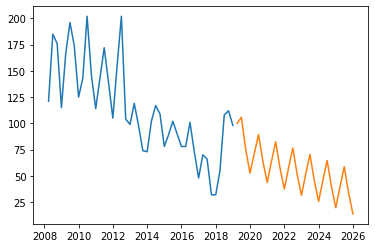

In [ ]:
plt.plot(date , nep_male)
plt.plot(pred_date , nepMALE_pred[0])

In [ ]:
import matplotlib.pyplot as plt

Agra_pred['NEP Male'] = nepMALE_pred[0] 

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


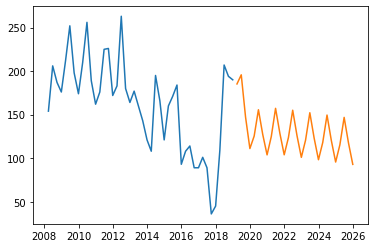

In [ ]:
nep_female = df['NEP Female']
nepFEMALE = dlm(nep_female)
nepFEMALE = nepFEMALE + trend(1, name='lineTrend', w=1.0  , discount=0.99)
nepFEMALE = nepFEMALE + seasonality(4, name='4qtr', w=1.0)
nepFEMALE = nepFEMALE + autoReg(degree=3, data=nep_female, name='ar3', w=1.0)
nepFEMALE.fit()
nepFEMALE_pred = nepFEMALE.predictN(N=28)
plt.plot(date , nep_female)
plt.plot(pred_date , nepFEMALE_pred[0])
Agra_pred['NEP Female'] = nepFEMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


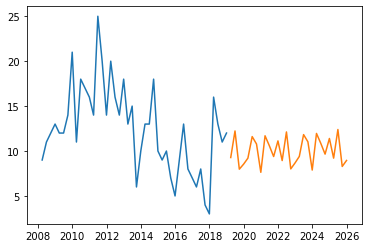

In [ ]:
ped_male = df['0-14 yrs NSP(NewAll207+) Male']
pedMALE = dlm(ped_male)
pedMALE = pedMALE + trend(1, name='lineTrend', w=1.0, discount=0.99)
pedMALE = pedMALE + seasonality(12, name='4qtr', w=1.0)
pedMALE = pedMALE + autoReg(degree=3, data=ped_male, name='ar3', w=1.0)
pedMALE.fit()
pedMALE_pred = pedMALE.predictN(N=28)
plt.plot(date , ped_male)
plt.plot(pred_date , pedMALE_pred[0])
Agra_pred['Pediatric Male'] = pedMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


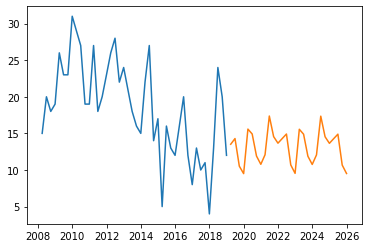

In [ ]:
ped_female = df['0-14 yrs NSP(NewAll207+) Female']
pedFEMALE = dlm(ped_female)
pedFEMALE = pedFEMALE + trend(1, name='lineTrend', w=1.0)
pedFEMALE = pedFEMALE + seasonality(12, name='4qtr', w=1.0)
pedFEMALE = pedFEMALE + autoReg(degree=3, data=ped_female, name='ar3', w=1.0)
pedFEMALE.fit()
pedFEMALE_pred = pedFEMALE.predictN(N=28)
plt.plot(date , ped_female)
plt.plot(pred_date , pedFEMALE_pred[0])
Agra_pred['Pediatric Female'] = pedFEMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


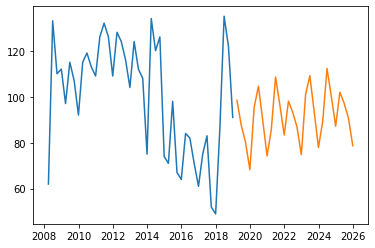

In [ ]:
male_15_24 = df['15-24 yrs NSP(NewAll207+) Male']
MALE1524 = dlm(male_15_24)
MALE1524 = MALE1524 + trend(1, name='lineTrend', w=1.0)
MALE1524 = MALE1524 + seasonality(12, name='4qtr', w=1.0)
MALE1524 = MALE1524 + autoReg(degree=3, data=male_15_24, name='ar3', w=1.0)
MALE1524.fit()
MALE1524_pred = MALE1524.predictN(N=28)
plt.plot(date , male_15_24)
plt.plot(pred_date , MALE1524_pred[0])
Agra_pred['15-24 Male'] = MALE1524_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


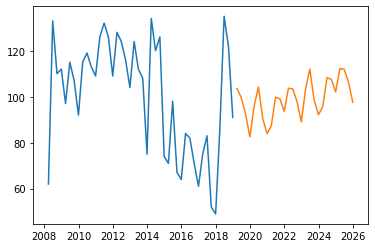

In [ ]:
female_15_24 = df['15-24 yrs NSP(NewAll207+) Female']
FEMALE1524 = dlm(female_15_24)
FEMALE1524 = FEMALE1524 + trend(1, name='lineTrend', w=1.0)
FEMALE1524 = FEMALE1524 + seasonality(12, name='4qtr', w=1.0)
FEMALE1524 = FEMALE1524 + autoReg(degree=3, data=female_15_24, name='ar3', w=1.0)
FEMALE1524.fit()
FEMALE1524_pred = FEMALE1524.predictN(N=28)
plt.plot(date , male_15_24)
plt.plot(pred_date , FEMALE1524_pred[0])
Agra_pred['15-24 Female'] = FEMALE1524_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


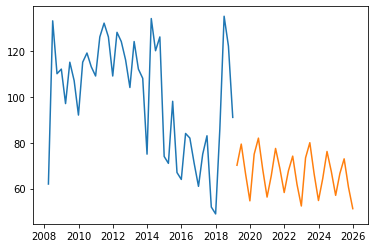

In [ ]:
male_25_34 = df['25-34 yrs NSP(NewAll207+) Male']
MALE2534 = dlm(male_25_34)
MALE2534 = MALE2534 + trend(1, name='lineTrend', w=1.0)
MALE2534 = MALE2534 + seasonality(12, name='4qtr', w=1.0)
MALE2534 = MALE2534 + autoReg(degree=3, data=male_25_34, name='ar3', w=1.0)
MALE2534.fit()
MALE2534_pred = MALE2534.predictN(N=28)
plt.plot(date , male_15_24)
plt.plot(pred_date , MALE2534_pred[0])
Agra_pred['25-34 Male'] = MALE2534_pred[0]

/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


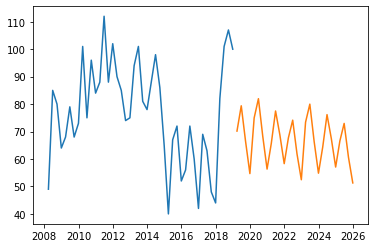

In [ ]:
female_25_34 = df['25-34 yrs NSP(NewAll207+) Male']
FEMALE2534 = dlm(female_25_34)
FEMALE2534 = FEMALE2534 + trend(1, name='lineTrend', w=1.0)
FEMALE2534 = FEMALE2534 + seasonality(12, name='4qtr', w=1.0)
FEMALE2534 = FEMALE2534 + autoReg(degree=3, data=female_25_34, name='ar3', w=1.0)
FEMALE2534.fit()
FEMALE2534_pred = FEMALE2534.predictN(N=28)
plt.plot(date , female_15_24)
plt.plot(pred_date , FEMALE2534_pred[0])
Agra_pred['25-34 Female'] = FEMALE2534_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


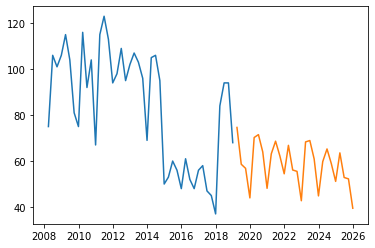

In [ ]:
male_35_44 = df['35-44 yrs NSP(NewAll207+) Male']
MALE3544 = dlm(male_35_44)
MALE3544 = MALE3544 + trend(1, name='lineTrend', w=1.0)
MALE3544 = MALE3544 + seasonality(12, name='4qtr', w=1.0)
MALE3544 = MALE3544 + autoReg(degree=3, data=male_35_44, name='ar3', w=1.0)
MALE3544.fit()
MALE3544_pred = MALE3544.predictN(N=28)
plt.plot(date , male_35_44)
plt.plot(pred_date , MALE3544_pred[0])
Agra_pred['35-44 Male'] = MALE3544_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


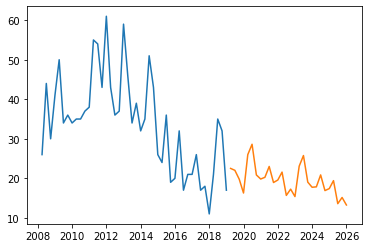

In [ ]:
female_35_44 = df['35-44 yrs NSP(NewAll207+) Female']
FEMALE3544 = dlm(female_35_44)
FEMALE3544 = FEMALE3544 + trend(1, name='lineTrend', w=1.0)
FEMALE3544 = FEMALE3544 + seasonality(12, name='4qtr', w=1.0)
FEMALE3544 = FEMALE3544 + autoReg(degree=3, data=female_35_44, name='ar3', w=1.0)
FEMALE3544.fit()
FEMALE3544_pred = FEMALE3544.predictN(N=28)
plt.plot(date , female_35_44)
plt.plot(pred_date , FEMALE3544_pred[0])
Agra_pred['35-44 Female'] = FEMALE3544_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


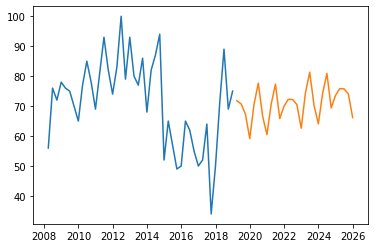

In [ ]:
male_45_54 = df['45-54 yrs NSP(NewAll207+) Male']
MALE4554 = dlm(male_45_54)
MALE4554 = MALE4554 + trend(1, name='lineTrend', w=1.0)
MALE4554 = MALE4554 + seasonality(12, name='4qtr', w=1.0)
MALE4554 = MALE4554 + autoReg(degree=3, data=male_45_54, name='ar3', w=1.0)
MALE4554.fit()
MALE4554_pred = MALE4554.predictN(N=28)
plt.plot(date , male_45_54)
plt.plot(pred_date , MALE4554_pred[0])
Agra_pred['45-54 Male'] = MALE4554_pred[0]

/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


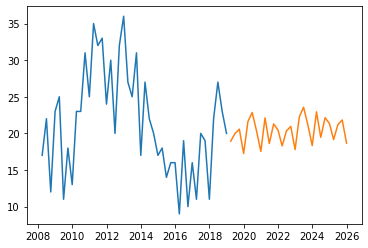

In [ ]:
female_45_54 = df['45-54 yrs NSP(NewAll207+) Female']
FEMALE4554 = dlm(female_45_54)
FEMALE4554 = FEMALE4554 + trend(1, name='lineTrend', w=1.0)
FEMALE4554 = FEMALE4554 + seasonality(12, name='4qtr', w=1.0)
FEMALE4554 = FEMALE4554 + autoReg(degree=3, data=female_45_54, name='ar3', w=1.0)
FEMALE4554.fit()
FEMALE4554_pred = FEMALE4554.predictN(N=28)
plt.plot(date , female_45_54)
plt.plot(pred_date , FEMALE4554_pred[0])
Agra_pred['45-54 Female'] = FEMALE4554_pred[0]

/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


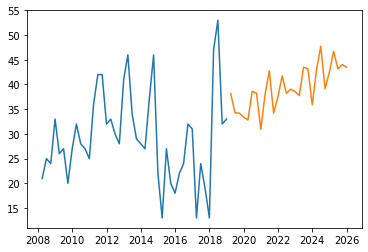

In [ ]:
ger_male = df['65 & above yrs NSP(NewAll207+) Male']
gerMALE = dlm(ger_male)
gerMALE = gerMALE + trend(1, name='lineTrend', w=1.0, discount=0.99)
gerMALE = gerMALE + seasonality(12, name='4qtr', w=1.0)
gerMALE = gerMALE + autoReg(degree=3, data=ger_male, name='ar3', w=1.0)
gerMALE.fit()
gerMALE_pred = gerMALE.predictN(N=28)
plt.plot(date , ger_male)
plt.plot(pred_date , gerMALE_pred[0])
Agra_pred['Geriatric Male'] = gerMALE_pred[0]

/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


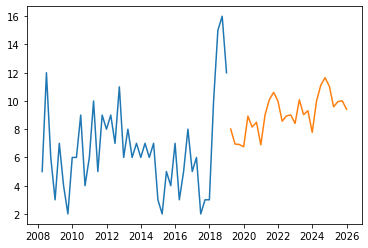

In [ ]:
ger_female = df['65 & above yrs NSP(NewAll207+) Female']
gerFEMALE = dlm(ger_female)
gerFEMALE = gerFEMALE + trend(1, name='lineTrend', w=1.0, discount=0.99)
gerFEMALE = gerFEMALE + seasonality(12, name='4qtr', w=1.0)
gerFEMALE = gerFEMALE + autoReg(degree=3, data=ger_female, name='ar3', w=1.0)
gerFEMALE.fit()
gerFEMALE_pred = gerFEMALE.predictN(N=28)
plt.plot(date , ger_female)
plt.plot(pred_date , gerFEMALE_pred[0])
Agra_pred['Geriatric Female'] = gerFEMALE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


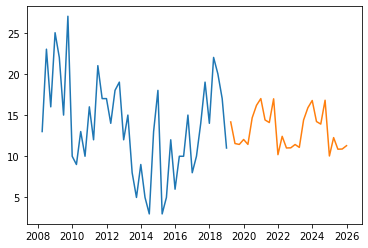

In [ ]:
failure = df['Total Failure']
FAILUREE = dlm(failure)
FAILUREE = FAILUREE + trend(1, name='lineTrend', w=1.0)
FAILUREE = FAILUREE + seasonality(12, name='4qtr', w=1.0)
FAILUREE = FAILUREE + autoReg(degree=3, data=failure, name='ar3', w=1.0)
FAILUREE.fit()
FAILUREE_pred = FAILUREE.predictN(N=28)
plt.plot(date , failure)
plt.plot(pred_date , FAILUREE_pred[0])
Agra_pred['Total Failure'] = FAILUREE_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


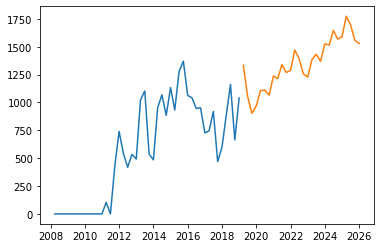

In [ ]:
hiv_test = df['SumOfHIV_Tested']
hivTEST = dlm(hiv_test)
hivTEST = hivTEST + trend(1, name='lineTrend', w=1.0, discount=0.99)
hivTEST = hivTEST + seasonality(12, name='4qtr', w=1.0)
hivTEST = hivTEST + autoReg(degree=3, data=hiv_test, name='ar3', w=1.0)
hivTEST.fit()
hivTEST_pred = hivTEST.predictN(N=28)
plt.plot(date , hiv_test)
plt.plot(pred_date , hivTEST_pred[0])
Agra_pred['Tested for HIV'] = hivTEST_pred[0]

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/usr/local/lib/python3.6/dist-packages/pydlm/modeler/autoReg.py:74: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


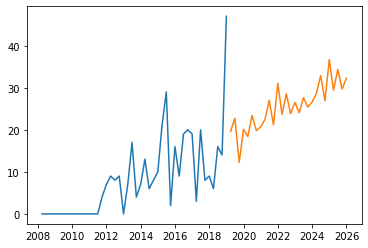

In [ ]:
hiv_infect = df['SumOfHIV_infected']
hivINFECT = dlm(hiv_infect)
hivINFECT = hivINFECT + trend(1, name='lineTrend', w=1.0, discount=0.99)
hivINFECT = hivINFECT + seasonality(12, name='4qtr', w=1.0)
hivINFECT = hivINFECT + autoReg(degree=3, data=hiv_infect, name='ar3', w=1.0)
hivINFECT.fit()
hivINFECT_pred = hivINFECT.predictN(N=28)
plt.plot(date , hiv_infect)
plt.plot(pred_date , hivINFECT_pred[0])
Agra_pred['Infected for HIV'] = hivINFECT_pred[0]

In [ ]:
Agra_pred['STATE'] = 'Uttar Pradesh'

In [ ]:
Agra_pred['DISTRICT'] = 'Agra'

In [ ]:
Agra_pred.rename(columns = {0 : 'Date'} , inplace = True)

In [ ]:
Agra_pred.to_csv('Desktop/BARPETA_pred.csv' , index = False)